# Preventing Credit Card Defaults - Part 1

In this activity, you will use Keras to build a neural network model that predicts whether a credit card customer will default on their debt. You will apply what you learned in the previous demonstration. But, instead of using a dataset that contains 2 features, you will build a neural network model from a dataset that contains 22 features and 1 target.

## Instructions:

1. Read the CSV file from the Resources folder into a Pandas DataFrame.

2. Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

3. Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

4. Create the training and testing sets using the `train_test_split` function from scikit-learn.

5. Scale the features data using the `StandardScaler` from sklearn.

6. Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

7. Display the model structure using the `summary` function.

## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)


In [39]:
# Imports
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

## Step 1:  Read the CSV file from the Resources folder into a Pandas DataFrame.

In [40]:
# Read the cc_default.csv file from the Resources folder into a Pandas DataFrame
cc_df = pd.read_csv(
    Path("../Resources/cc_default.csv")
)

# Review the DataFrame
cc_df.head()


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Step 2: Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

In [41]:
# Define features set X by selecting all columns but DEFAULT
X = cc_df.drop(columns=["DEFAULT"])

# Display the features DataFrame
X.head()


,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## Step 3: Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

In [42]:
# Define target set by selecting the DEFAULT column
y = cc_df["DEFAULT"]

# Display a sample y

y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

## Step 4: Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [43]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Step 5: Scale the features data using the `StandardScaler` from sklearn.

In [44]:
# Create the StandardScaler instance
X_scaler = StandardScaler()


In [45]:
# Fit the scaler to the features training dataset

X_scaler.fit(X_train)

StandardScaler()

In [46]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 


## Step 6: Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

In [47]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [48]:
# Define the the number of inputs to the model
number_inputs = 22

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer to the model specifying the number of output neurons and activation function
number_classes = 1
                 
neuron.add(Dense(units=number_classes, activation="sigmoid"))
                 

## Step 7: Display the model structure using the `summary` function.

In [49]:
# Display the Sequential model summary

neuron.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                276       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Comppile the model - think of this as defining the NN's structure (like designing/building a house)

neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# loss = specifices the loss function.. loss function uses ML algorithms to score the performance 
# of the model after each iteration --> this allows us to see the how the model's performance changes over each iteration


# binary_crossentropy is a type of loss function - designed to deal with BINARY CLASSIFICATIOn problems 

# optimizer is a type of OPTIMIZATION FUNCTION - this function shapes and molds a NN model while the model is trained on the data, which ensures the model's best performance
# optimization function reduces the model's losses and provides the most accurate output possible 
# "adam" optimizer : this uses a GRADIENT DESCENT approach --> which ensures that weaker classifying vairables and features will NOT confuse the model 
# and cause it to return less accurate results 

# Gradient Descent is used to identify the combination of function paramerters that will allow the model to learn as efficiently as possible, until it has learned everything it can 

In [52]:
# Evaluation metrics 

# metrics: parameter that specifices additional metrics that assess the quality of a NN model 

# 2 main evalulation metrics: MODEL PREDICITIVE ACCURACY & MODEL MEAN SQUARED ERROR (MSE) 

# - Model predictive accuracy = (accuracy) for classification models --> 0 to 1 scale -- closer to 1 is higher accuracy value  

# - Model mean square error = (mse) for regression models --> 0 to 1 scale -- close to 0, the more accurate the prediction 



In [53]:
# Fitting the model 

model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 0.5209 - accuracy: 0.7733
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4596 - accuracy: 0.8143
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4512 - accuracy: 0.8173
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.8175
Epoch 5/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8181
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4419 - accuracy: 0.8202
Epoch 7/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8202
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4390 - accuracy: 0.8207
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.8205
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4369 - accura

In [36]:
# Create a DataFrame with the history dictionary

df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<AxesSubplot:>

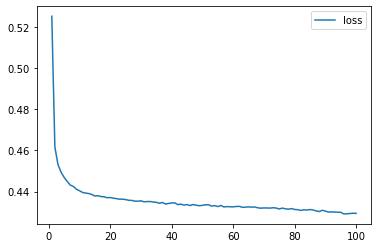

In [37]:
# Plot the loss 

df.plot(y="loss")

<AxesSubplot:>

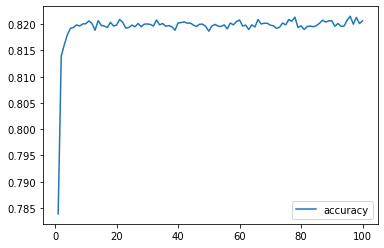

In [38]:
# Plot the accuracy

df.plot(y="accuracy")

In [55]:
# Evaluate the model using testing data

model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

235/235 - 12s - loss: 0.4393 - accuracy: 0.8155 - 12s/epoch - 52ms/step


In [56]:
# Display evaluation results

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.43928298354148865, Accuracy: 0.8154666423797607


In [58]:
from sklearn.datasets import make_blobs

In [59]:
# Create 10 new samples of dummy data

new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1) 



In [60]:
# Make predictions

predictions = (neuron.predict(new_X) > 0.5).astype("int32")

ValueError: in user code:

    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\aarch\anaconda3\envs\dev\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 22), found shape=(None, 2)


In [61]:
# Create a DataFrame to compare the predictions with the actual values

results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})



NameError: name 'predictions' is not defined